In [133]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from proj1_helpers import *
from helpers import *
from implementations import *
print("Importation complete")
DATA_TRAIN_PATH = '../data/train.csv'
DATA_TEST_PATH = '../data/test.csv'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Importation complete


## Load the training data into feature matrix, class labels, and event ids:

In [132]:
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
print("training data is loaded")

training data is loaded


## Data Analyzing

In [44]:
# As we can see here, y only takes value -1 or 1:
for value in y:
    assert(value==1 or value==-1)
print("All value in y is equal either to 1 or -1.")


All value in y is equal either to 1 or -1.


This means that y is a binary variable. So should we modify y's domain to {0, 1} instead of {-1, 1} if we want the logistic regression methods to work?
Note that at first sight, logistic regression seems to be the best solution to fit the data since this method was designed for binary classification.
- We implemented two methods minus_one_to_zero() and zero_to_minus_one() in the helper methods section that translate y from one domain to the other.

## Data Cleaning
We have to handle:
- outliers:
A value is considered as an outlier if it does not fit in a range defined from quartiles. Outliers are replaced by the mean value of the observations.
- unasssigned values (-999, 999):
We proceed the same way
- We also standardize the data using the given standardize method. Note that this adds a row of ones in front of the data tX, whose dimension change as we can see:


In [45]:
tX = data_cleaning(tX)

shape of tX before standardizing: (250000, 30)
shape of tX before standardizing: (250000, 31)
data cleaning completed


### Using PCA to get rid of features that don't give enough information

After running some tests we figured out that PCA actually worsens our results. This seems legit since it discards some features. Note that it can still be useful for methods that can't handle calculus if the matrices are too big (ex: logistic regression with polynomial basis).

In [33]:
#tX = PCA(tX)

Previous number of features in tX: 31
New number of features in tX: 25
PCA completed


In [ ]:
tX_subset = tX_tr[0:20000]
y_subset = y_tr[0:20000]
w_initial = np.zeros(tX_subset.shape[1])
w, loss = reg_logistic_regression(y_subset,tX_subset, 0, w_initial, 50, 1e-2)
print("data fitting:",error(y_te,predict_labels(w,tX_te)),"%")

## Use Polynomial Regression to find the optimal degree for least squares method

In [155]:
polynomial_regression()

NameError: name 'tX' is not defined

### Results
Looking at the results, it seems like 3 is the optimal degree. However, we might be overfitting the data because there is no regularization step in polynomial_regression. Also the result is biased because the data is not split into training/testing subsets. Thus we'll use the Ridge regression, which uses a regularizer that depends on a parameter lambda.
We'll compute the RMSE for different lambda and degree values in order to determine the best ones.

## Use Ridge Regression to determine optimal lambda
This is a demo where we use ridge regression to deduce the loss function and the error percentage of the testing data for each (degree, lambda) pair. We iterate over different degree/lambda values to find the best ones. Recall that lambda is a coefficient penalizing the size of regression coefficients. Ridge regression introduces bias but reduces the variance of the estimate.

In [ ]:
seed = 1
split_ratio = 0.8
w, loss = ridge_regression_demo(tX, y, split_ratio, seed)

In [85]:
test = [[1,2],[3,4]]
print((np.argmax(test)))

3


After running a few tests with ridge regression, it seems like we should not go above degree 10.

# Use Cross-Validation to find best degree and lambda values

Here is a demo of the cross-validation function. We basically run cross-validation for different lamdda/degree combinations to determine which one gives the smallest error, exactly as we did above with ridge_regression_demo.
The difference is that above it was a simple 2-fold split of the data, but now we do a k-fold (here k=4) which gives us a less biased error.
<br>
The idea is to first run this demo with a large number of degree and a large domain for lambda but few lambdas to save computation time. This gives us a good idea of the values we're looking for
<br>
After that we can refine the search, take only one or two degrees, a smaller domain for lambda but more lambdas in it.

fitting for degree 7 and lambda 1e-12 : 75.0836
fitting for degree 7 and lambda 1.59985871961e-12 : 78.8852
fitting for degree 7 and lambda 2.5595479227e-12 : 80.5888
fitting for degree 7 and lambda 4.09491506238e-12 : 81.2376
fitting for degree 7 and lambda 6.5512855686e-12 : 81.4376
fitting for degree 7 and lambda 1.04811313415e-11 : 81.37480000000001
fitting for degree 7 and lambda 1.67683293681e-11 : 81.40039999999999
fitting for degree 7 and lambda 2.68269579528e-11 : 81.42
fitting for degree 7 and lambda 4.29193426013e-11 : 81.422
fitting for degree 7 and lambda 6.86648845004e-11 : 81.4308
fitting for degree 7 and lambda 1.09854114199e-10 : 81.4268
fitting for degree 7 and lambda 1.75751062485e-10 : 81.428
fitting for degree 7 and lambda 2.81176869797e-10 : 81.43079999999999
fitting for degree 7 and lambda 4.49843266897e-10 : 81.43199999999999
fitting for degree 7 and lambda 7.19685673001e-10 : 81.4324
fitting for degree 7 and lambda 1.15139539933e-09 : 81.43360000000001
fitting 

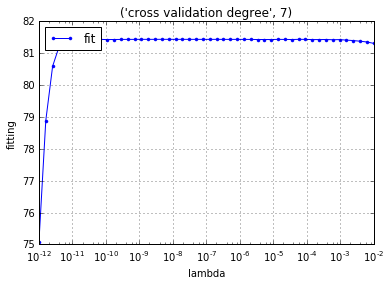

In [97]:
degrees = [7]
k_fold = 4
#lambdas = np.logspace(-12, -9, 6)
lambdas = np.logspace(-12, -2, 50)
cross_validation_demo(tX, y, k_fold, degrees, lambdas, ridge_regression)

The result of this experiment is that the best combinaison we obtain is a fitting of 81.4376 for degree 7 and lambda = 6.5512855686e-12

## Computing the weights with different methods

### Reloading and splitting the data

In [124]:
y, tX, ids = load_data()
tX = data_cleaning(tX)
tX_tr, y_tr, tX_te, y_te = split_data(tX, y, 3/4)

training data is loaded
shape of tX before standardizing: (250000, 30)
shape of tX before standardizing: (250000, 31)
data cleaning completed


### Least Squares

In [6]:
w, loss = least_squares(y_tr, tX_tr)
print("Data fitting:",error(y_te,predict_labels(w,tX_te)),"%")
print("AMS:",compute_AMS(w, y_te, tX_te))

Data fitting: 77.3616 %
AMS: 698.749183579


### Least Squares with polynomial basis

In [7]:
poly_basis_tr = build_poly(tX_tr, 2)
poly_basis_te = build_poly(tX_te, 2)
w, loss = least_squares(y_tr, poly_basis_tr)
# build a polynomial basis of the same size as training set for the testing set
print("data fitting:",error(y_te,predict_labels(w,poly_basis_te)),"%")
print("AMS:",compute_AMS(w, y_te, poly_basis_te))

data fitting: 79.58239999999999 %
AMS: 730.512848485


### Least Squares - Gradient Descent

In [13]:
gamma = 1e-7
initial_w = 0*np.ones(len(tX[0])) #try changing initial w
max_iters = 20
w, loss = least_squares_GD(y_tr, tX_tr, initial_w, max_iters, gamma)
print("data fitting",error(y_te,predict_labels(w,tX_te)),"%")
print("AMS:",compute_AMS(w, y_te, tX_te))

data fitting 72.52799999999999 %
AMS: 625.342987397


### Least Squares - Stochastic Gradient Descent

In [9]:
gamma = 1e-7
initial_w = 0*np.ones(len(tX[0])) #try changing initial w
max_iters = 10
w, loss = least_squares_SGD(y_tr, tX_tr, initial_w, max_iters, gamma)
print("data fitting",error(y_te,predict_labels(w,tX_te)),"%")
print("AMS:",compute_AMS(w, y_te, tX_te))

data fitting 72.5264 %
AMS: 625.317583103


### Ridge Regression with polynomial basis

In [38]:
# to find optimal degree and lambda, check "Use RR to determine optimal
# lambda and degree" section
degree = 5
poly_basis_tr = build_poly(tX_tr, degree)
lambda_ = 1e-11
poly_basis_te = build_poly(tX_te, degree)
w, loss = ridge_regression(y_tr, poly_basis_tr, lambda_)
print("data fitting:",error(y_te,predict_labels(w,poly_basis_te)),"%")
print("AMS:",compute_AMS(w, y_te, poly_basis_te))

data fitting: 79.81439999999999 %
AMS: 733.768544131


### Logistic Regression

In [127]:
max_iter = 50
gamma = 1e-5
y01 = minus_one_to_zero(y_tr)

y_red = y01
x_red = tX_tr
w_initial, _ = least_squares(y, tX)
#w_initial = np.ones(tX_tr.shape[1])
w,loss = logistic_regression(y_red, x_red, w_initial, max_iter, gamma)
print("data fitting:",error(y_te,predict_labels(w,tX_te)),"%")
print("AMS:",compute_AMS(w, y_te, tX_te))

Current iteration=0, the loss=103761.64118282413
Current iteration=1, the loss=93885.7977192248
Current iteration=2, the loss=91448.45844444552
Current iteration=3, the loss=90306.15766872081
Current iteration=4, the loss=89706.23392456224
Current iteration=5, the loss=89370.71811736
Current iteration=6, the loss=89168.42404876703
Current iteration=7, the loss=89039.15272002181
Current iteration=8, the loss=88952.76723435456
Current iteration=9, the loss=88893.03184028868
Current iteration=10, the loss=88850.56630385721
Current iteration=11, the loss=88819.65658250837
Current iteration=12, the loss=88796.68691519476
Current iteration=13, the loss=88779.30019154739
Current iteration=14, the loss=88765.9214132933
Current iteration=15, the loss=88755.47486367195
Current iteration=16, the loss=88747.21096279437
Current iteration=17, the loss=88740.59756890018
Current iteration=18, the loss=88735.25027619062
Current iteration=19, the loss=88730.8868565768
Current iteration=20, the loss=8872

### Logistic Regression with polynomial basis

In [24]:
max_iter = 100
gamma = 1e-7
y01 = minus_one_to_zero(y_tr)

best_fitting = 0
y_red = y01[0:1000]
x_red = tX_tr[0:1000]
degrees = [1, 2, 3, 4, 5]
best_degree = degrees[0]
for degree in degrees:
    poly_basis_tr = build_poly(x_red, degree)
    initial_w = np.zeros(poly_basis_tr.shape[1])
    w,loss = logistic_regression(y_red, poly_basis_tr, initial_w, max_iter, gamma)
    poly_basis_te = build_poly(tX_te, degree)
    fitting = error(y_te,predict_labels(w,poly_basis_te))
    print("degree",degree,"-> fitting:",fitting)
    if(best_fitting < fitting):
        best_fitting = fitting
        best_degree = degree
print("best fitting:",best_fitting,"obtained with degree",best_degree)

Current iteration=0, the loss=693.1471805599322
Current iteration=1, the loss=693.1249363341697
The loss=693.1026952652824
degree 1 -> fitting: 73.56320000000001
Current iteration=0, the loss=693.1471805599322
Current iteration=1, the loss=693.035534374253
The loss=692.9241656477159
degree 2 -> fitting: 67.4624
Current iteration=0, the loss=693.1471805599322
Current iteration=1, the loss=691.2371115088397
Current iteration=2, the loss=690.569089351456
Current iteration=3, the loss=689.9891483731863
Current iteration=4, the loss=689.4507329775669
The loss=688.9387539970315
degree 3 -> fitting: 71.6928
Current iteration=0, the loss=693.1471805599322
Current iteration=1, the loss=697.6593250076747
Current iteration=2, the loss=692.3235602901568
Current iteration=3, the loss=688.1966916570093
Current iteration=4, the loss=684.8651450312649
Current iteration=5, the loss=682.227700078745
Current iteration=6, the loss=680.192520348591
Current iteration=7, the loss=678.4965446704783
Current it

C:\Users\rbsteinm\Google Drive\EPFL\MA1\PCML\Projetcs\project1\scripts\implementations.py:191: RuntimeWarning: overflow encountered in exp
  loss += np.log(1+np.exp(row.dot(w)))-y[index]*(row).dot(w)


OverflowError: cannot convert float infinity to integer

### Logistic Regression using Newton's method

In [154]:
max_iter = 100
gamma = 1e-4
y01 = minus_one_to_zero(y_tr)

y_red = y01[0:15000]
x_red = tX_tr[0:15000]
initial_w = np.zeros(x_red.shape[1])

w,loss = newton_logistic_regression(y_red, x_red, max_iter, gamma, initial_w)
print("data fitting:",error(y_te,predict_labels(w,tX_te)),"%")
#print("AMS:",compute_AMS(w, y_te, tX_te))

Current iteration=0, the loss=10397.207708401134
The loss=10395.573724355803
data fitting: 77.28960000000001 %


## Generate predictions and save ouput in csv format for submission:

In [100]:
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
print("testing data is loaded")
tX_test = data_cleaning(tX_test)
#tX_test = PCA(tX_test)

done
shape of tX before standardizing: (568238, 30)
shape of tX before standardizing: (568238, 31)
data cleaning completed


In [101]:
y, tX, ids = load_data()
tX = data_cleaning(tX)
#tX = PCA(tX)

training data is loaded
shape of tX before standardizing: (250000, 30)
shape of tX before standardizing: (250000, 31)
data cleaning completed


In [ ]:
# test ridge regression with poly basis of degree 5
lambda_ = 1e-11
degree = 5
#tX_test,_,_ = standardize(tX_test)
poly_basis_te = build_poly(tX_test, degree)
poly_basis_tr = build_poly(tX, degree)
w, loss = ridge_regression(y, poly_basis_tr, lambda_)
print("done")

In [102]:
# test ridge regression with poly basis of degree 7
# This is the optimal solution with cleaning and no PCA
lambda_ = 6.5512855686e-12
degree = 7
#tX_test,_,_ = standardize(tX_test)
poly_basis_te = build_poly(tX_test, degree)
poly_basis_tr = build_poly(tX, degree)
w, loss = ridge_regression(y, poly_basis_tr, lambda_)
print("done")

done


In [ ]:
# test least squares
degree = 2
tX_test,_,_=standardize(tX_test)
poly_basis_te = build_poly(tX_test, degree)
poly_basis_tr = build_poly(tX, degree)
w, loss = least_squares(y, poly_basis_tr)

In [ ]:
# test ridge regression with poly_basis of degree 2
lambda_ = 0.00138949549437
degree = 2
tX_test,_,_ = standardize(tX_test)
poly_basis_te = build_poly(tX_test, degree)
poly_basis_tr = build_poly(tX, degree)
w, loss = ridge_regression(y, poly_basis_tr, lambda_)
print("done")

In [ ]:
# test ridge regression no data cleaning
lambda_ = 0.000268269579528 
w, loss = ridge_regression(y, tX, lambda_)
#print(error(y_te,predict_labels(w,tX_te_poly)))

In [ ]:
print(w.shape)
print(tX_test.shape)

In [105]:
OUTPUT_PATH = '../data/submissionData/RR_deg7.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(w, poly_basis_te)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)
print("done")

done


In [104]:
print(y_pred.shape)
print(tX_test.shape)

(568238,)
(568238, 31)
